In [1]:
import os
import time as timer

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

import numpy as np

from sklearn.preprocessing import MinMaxScaler

from torchvision import datasets
import torchvision.transforms as T

## My own modules
import viz_utils as vu
import train_utils as tu
import model_utils as mu
###

import imp
imp.reload(vu)
imp.reload(mu)
imp.reload(tu)

/var/folders/wb/ttr9x7pn27q1_rp5vtjfr0s00000gn/T/ipykernel_2952/3262691840.py:22: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


<module 'train_utils' from '/Users/mghifary/Work/govtech/codes/AI/deeplearning/train_utils.py'>

In [2]:
DATA_DIR = "../data"
MODEL_DIR = "../models"

EPOCHS = 100
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
dz = 300

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# Load dataset
training_data = datasets.FashionMNIST(
    root=DATA_DIR, 
    train=True, 
    download=True,
    transform=T.ToTensor(), #convert to Tensor and normalize to (0, 1)
)

test_data = datasets.FashionMNIST(
    root=DATA_DIR,
    train=False,
    download=True,
    transform=T.ToTensor(), #convert to Tensor and normalize to (0, 1)
)

[n, dx1, dx2] = training_data.data.shape

In [4]:
# Create data loaders
train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE)

In [5]:
print(f"Using {DEVICE} device")

# Define model
model = mu.MLPAutoEnc(d_in=dx1*dx2, d_z=dz, d_h=512).to(DEVICE)

# model_path = os.path.join(MODEL_DIR, "mlpautoenc_ep100_fmnist.pth")
model_path = os.path.join(MODEL_DIR, "mlpautoenc_sigm_ep100_fmnist.pth")
model.load_state_dict(torch.load(model_path))
model.eval()

print(model)

Using cpu device
MLPAutoEnc(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=300, bias=True)
    (3): Sigmoid()
  )
  (decoder): Sequential(
    (0): Linear(in_features=300, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=784, bias=True)
    (3): Sigmoid()
  )
)


In [6]:
# c = 1
# print(training_data.classes[c])
# idx = (training_data.targets == c)
# X2d = training_data.data[idx]

# idx_t = (test_data.targets == c)
# X2d_t = test_data.data[idx_t]

In [7]:
X2d = training_data.data
X2d_t = test_data.data

img_np : 0.0 1.0


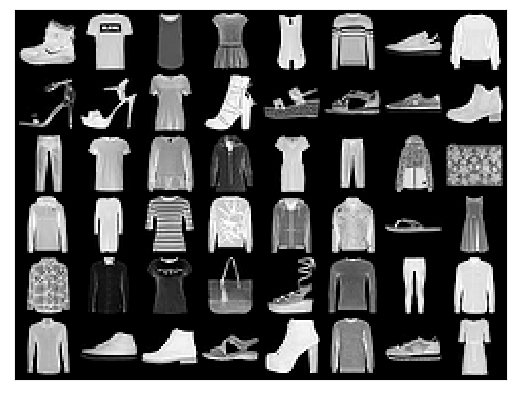

In [8]:
grid = vu.set_grid(X2d, num_cells=48)
vu.show(grid)

img_np : 0.0 1.0


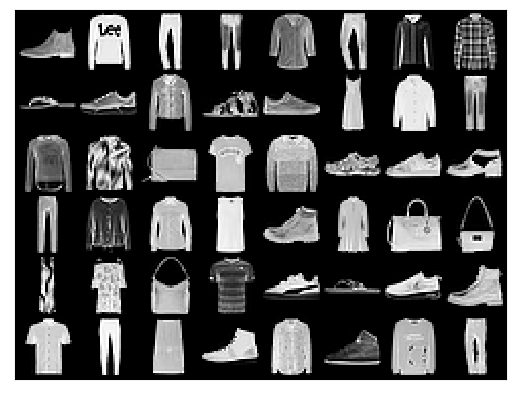

In [9]:
grid = vu.set_grid(X2d_t, num_cells=48)
vu.show(grid)

In [10]:
X = torch.reshape(X2d, (-1, dx1 * dx2))
Xt = torch.reshape(X2d_t, (-1, dx1 * dx2))

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
Xn = torch.from_numpy(scaler.fit_transform(X))
Xn_t = torch.from_numpy(scaler.transform(Xt))

In [12]:
Xn = Xn.float()
Xn_t = Xn_t.float()

In [13]:
# Reconstruct
Xrec = model(Xn)
Xrec_t = model(Xn_t)

img_np : 0.0 1.0


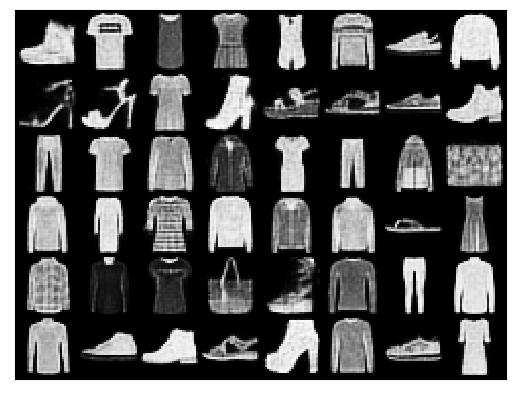

In [14]:
# Training reconstruction
V = torch.reshape(Xrec, (-1, dx1, dx2))
grid = vu.set_grid(V, num_cells=48)
vu.show(grid)

img_np : 0.0 1.0


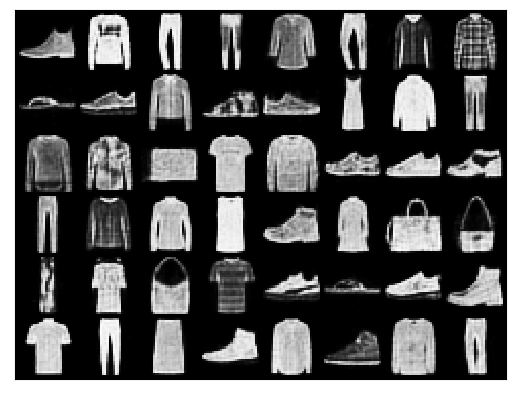

In [15]:
# Test reconstruction
V = torch.reshape(Xrec_t, (-1, dx1, dx2))
grid = vu.set_grid(V, num_cells=48)
vu.show(grid)

In [16]:
r = torch.mean(torch.sqrt(torch.sum((Xn - Xrec)**2, 1)))
r

tensor(1.4550, grad_fn=<MeanBackward0>)

In [17]:
train_rec_loss = torch.mean(torch.sqrt(torch.sum((Xn - Xrec)**2, 1)))
test_rec_loss = torch.mean(torch.sqrt(torch.sum((Xn_t - Xrec_t)**2, 1)))

print(f"Train reconstruction loss: {train_rec_loss:>.2f}")
print(f"Test reconstruction loss: {test_rec_loss:>.2f}")

Train reconstruction loss: 1.45
Test reconstruction loss: 1.51
